<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/blob/main/L02_03_Neurona_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurona Logística
## Dr. Carlos Villaseñor

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Paso 2. Revisa el siguiente código de la neurona lineal y completa las líneas que faltan

In [2]:
class Logistic_Neuron:

    def __init__(self, n_inputs, learning_rate=0.1):
        self.w = - 1 + 2 * np.random.rand(n_inputs)
        self.b = - 1 + 2 * np.random.rand()
        self.eta = learning_rate

    def predict_proba(self, X):
        Z = np.dot(self.w, X) + self.b
        Y_est = 1/(1+np.exp(-Z))
        return Y_est
    
    def predict(self, X, umbral=0.5):
        Y_est = self.predict_proba(X)
        return 1 * (Y_est > umbral)

    def train(self, X, Y, epochs=100):
        p = X.shape[1]
        for _ in range(epochs):
            Y_est = self.predict_proba(X)
            diff = Y - Y_est
            self.w += (self.eta/p) * np.dot((diff), X.T).ravel()
            self.b += (self.eta/p) * np.sum(diff)

Paso 3. Corre el siguiente ejemplo

[0.00864325 0.15143022 0.150759   0.78418237]
[0 0 0 1]


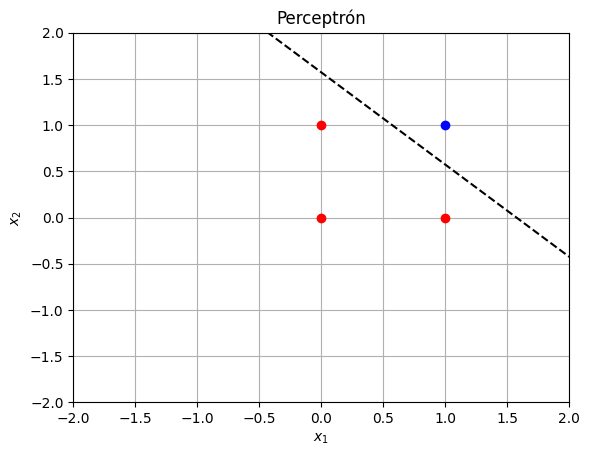

In [3]:
# Ejemplo
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([0, 0, 0, 1])

neuron = Logistic_Neuron(2, 1)
neuron.train(X,Y)
print(neuron.predict_proba(X)) 
print(neuron.predict(X)) 

def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b 
  plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)],'--k')

# Primero dibujemos los puntos
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Perceptrón')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
draw_2d_percep(neuron)
plt.savefig("output.png")
plt.show()